In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

iris = load_iris()
iris.keys()
iris_data = iris.data
iris_target = iris.target
df_iris = pd.DataFrame(data = iris_data, columns=iris.feature_names)

In [2]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
df_iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [4]:
df_target = pd.DataFrame(data = iris_target, columns=['label'])
data = pd.concat([df_iris, df_target], axis=1)

In [5]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
X = data.iloc[:,0:4].values
y = data.iloc[:,4].values

n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

from keras.utils import to_categorical

nb_classes = 3

y = to_categorical(y, nb_classes)

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [7]:
n_steps = X.shape[1]
n_steps

4

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.optimizers import SGD,Adam

def build_model(): 
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(3))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0048), metrics=['accuracy'])
    
    return model

model = build_model() 
print("input_shape => ", n_steps, n_features)
model.summary() 

input_shape =>  4 1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 3, 64)             192       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 64)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 50)                3250      
                                                                 
 dense_1 (Dense)             (None, 3)                 153       
                                                                 
Total params: 3,595
Trainable params: 3,595
Non-trainable params: 0
__________________________________

c:\Users\TFG155\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [9]:
#fitting the model and predicting 

# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
4/4 [==============================] - 1s 81ms/step - loss: 4.9697 - accuracy: 0.3083 - val_loss: 6.9845 - val_accuracy: 0.4333
Epoch 2/100
4/4 [==============================] - 0s 16ms/step - loss: 4.9697 - accuracy: 0.3083 - val_loss: 6.9845 - val_accuracy: 0.4333
Epoch 3/100
4/4 [==============================] - 0s 17ms/step - loss: 4.9697 - accuracy: 0.3083 - val_loss: 6.9845 - val_accuracy: 0.4333
Epoch 4/100
4/4 [==============================] - 0s 15ms/step - loss: 4.9697 - accuracy: 0.3083 - val_loss: 6.9845 - val_accuracy: 0.4333
Epoch 5/100
4/4 [==============================] - 0s 15ms/step - loss: 4.9697 - accuracy: 0.3083 - val_loss: 6.9845 - val_accuracy: 0.4333
Epoch 6/100
4/4 [==============================] - 0s 16ms/step - loss: 4.9697 - accuracy: 0.3083 - val_loss: 6.9845 - val_accuracy: 0.4333
Epoch 7/100
4/4 [==============================] - 0s 16ms/step - loss: 4.9697 - accuracy: 0.3083 - val_loss: 6.9845 - val_accuracy: 0.4333
Epoch 8/100
4/4 [===

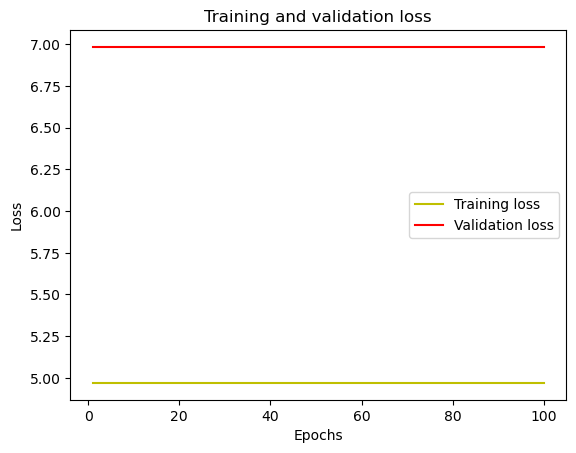

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

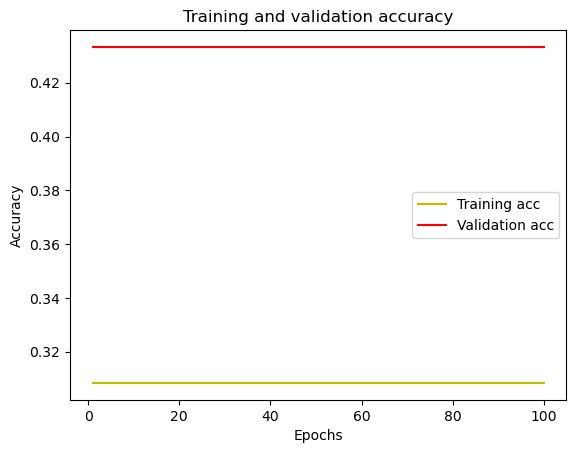

In [11]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.43      1.00      0.60        13
           2       0.00      0.00      0.00         6

    accuracy                           0.43        30
   macro avg       0.14      0.33      0.20        30
weighted avg       0.19      0.43      0.26        30

[[ 0 11  0]
 [ 0 13  0]
 [ 0  6  0]]


c:\Users\TFG155\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\TFG155\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\TFG155\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
